In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import missingno as msno


# data frame general limpio
ring = pd.read_csv('../data/ring_unico.csv')

In [66]:
#cambio de nombre a las columnas 
ring.rename(columns={'R_fighter': 'Red', 'B_fighter': 'Blue'}, inplace = True)

# creacion de la columna ganadores
def ganador(x):
    if x["Winner"]=="Blue":
        return x["Blue"]
    else: 
        return x["Red"]    
ring["ganador"] = ring.apply(ganador,axis=1)

# dataset:  numero de victorias totales sin separacion de genero
ganadoresM = ring.groupby("ganador")["Winner"].count()

# datasets:  creacion de data set por genero
ringMALE = ring[ring["gender"]=="MALE"]
ringFEMALE = ring[ring["gender"]=="FEMALE"]


# datasets:  conteo de victorias por genero
ganadoras = ringFEMALE.groupby("ganador")["Winner"].count()
ganadores = ringMALE.groupby("ganador")["Winner"].count()

# dataset:  peleas por alcance
tamaño = ring[["Red","R_Height_cms","Blue","B_Height_cms","height_dif","ganador"]]


# dataset:  peleas por rango
reach = ring[["Red","R_Reach_cms","Blue","B_Reach_cms","reach_dif","ganador"]]

In [2]:
# -----------------------------------------------------------data frames creados a partir del general-----------------------------------------
# data frames por genero
male = pd.read_csv("../data/country_male.csv")
maleclass = pd.read_csv("../data/class_male.csv")
female = pd.read_csv("../data/country_female.csv")
femaleclass = pd.read_csv("../data/class_female.csv")


# data frames especificos
alcance = pd.read_csv("../data/data por alcance.csv")
tamaño = pd.read_csv("../data/data por tamaño.csv")
metodo = pd.read_csv("../data/metodos_y_tiempos.csv")
graficat = pd.read_csv("../data/grafica_tamaño.csv")

In [103]:
# data por rango  (creacion de data por alcance)

In [163]:
# quien gana mas por tamaño (mas grande , mas pequeño)

altosAzul = ((tamaño["ganador"] == tamaño["Blue"]) & (tamaño["height_dif"]>0))
tamaño2 = tamaño[altosAzul]  
tamaño2["ganador_height"] = "alto"



altosRojo = ((tamaño["ganador"] == tamaño["Red"]) & (tamaño["height_dif"]>0))
tamaño3 = tamaño[altosRojo]  
tamaño3["ganador_height"] = "alto"



bajosAzul = ((tamaño["ganador"] == tamaño["Blue"]) & (tamaño["height_dif"]<0))
tamaño4 = tamaño[bajosAzul]  
tamaño4["ganador_height"] = "bajo"



bajosRojo = ((tamaño["ganador"] == tamaño["Red"]) & (tamaño["height_dif"]<0))
tamaño5 = tamaño[bajosRojo]  
tamaño5["ganador_height"] = "bajo"


neutros = tamaño["height_dif"] == 0
neutro =tamaño[neutros]
neutro["ganador_height"]= "neutro"



# juntarlos----------------------------------------------------------------------------------------------------------------------------------

df1 = pd.DataFrame(tamaño2)
df2 = pd.DataFrame(tamaño3)
df3 = pd.DataFrame(tamaño4)
df4 = pd.DataFrame(tamaño5)
df5 = pd.DataFrame(neutro)
df6 = df1.append(df2)
df7 = df6.append(df3)
df8 = df7.append(df4)
df9 = df8.append(df5)

df9.reset_index(inplace = True)
del df9["index"]
df9.to_csv("data por tamaño.csv")

<ipython-input-163-8b9d02e64d66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tamaño2["ganador_height"] = "alto"
<ipython-input-163-8b9d02e64d66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tamaño3["ganador_height"] = "alto"
<ipython-input-163-8b9d02e64d66>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [104]:
# data por alcance (creacion de data por tamaño)

In [95]:
# quien gana mas por alcance de brazo

largoAzul = ((reach["ganador"] == reach["Blue"]) & (reach["reach_dif"]>0))
reach2 = reach[largoAzul]  
reach2["mejor_alcance"] = "largo"


largoRojo = ((reach["ganador"] == reach["Red"]) & (reach["reach_dif"]>0))
reach3 = reach[largoRojo]  
reach3["mejor_alcance"] = "largo"


cortoAzul = ((reach["ganador"] == reach["Blue"]) & (reach["reach_dif"]<0))
reach4 = reach[cortoAzul]  
reach4["mejor_alcance"] = "corto"


cortoRojo = ((reach["ganador"] == reach["Red"]) & (reach["reach_dif"]<0))
reach5 = reach[cortoRojo]  
reach5["mejor_alcance"] = "corto"


neutros =reach["reach_dif"]==0
neutro = reach[neutros]  
neutro["mejor_alcance"] = "neutro"

# juntarlos----------------------------------------------------------------------------------------------------------------------------

df1 = pd.DataFrame(reach2)
df2 = pd.DataFrame(reach3)
df3 = pd.DataFrame(reach4)
df4 = pd.DataFrame(reach5)
df5 = pd.DataFrame(neutro)

df6 = df1.append(df2)
df7 = df6.append(df3)
df8 = df7.append(df4)
df9 = df8.append(df5)

df9.reset_index(inplace = True)
del df9["index"]
df9
df9.to_csv("data por alcance.csv")

<ipython-input-95-67842cca31a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reach2["mejor_alcance"] = "largo"
<ipython-input-95-67842cca31a4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reach3["mejor_alcance"] = "largo"
<ipython-input-95-67842cca31a4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Red,R_Reach_cms,Blue,B_Reach_cms,reach_dif,ganador,mejor_alcance
0,Molly McCann,157.48,Lara Procopio,170.18,12.70,Lara Procopio,largo
1,Andrew Sanchez,187.96,Makhmud Muradov,190.50,2.54,Makhmud Muradov,largo
2,Nik Lentz,172.72,Movsar Evloev,182.88,10.16,Movsar Evloev,largo
3,Victoria Leonardo,162.56,Manon Fiorot,170.18,7.62,Manon Fiorot,largo
4,Wu Yanan,167.64,Joselyne Edwards,177.80,10.16,Joselyne Edwards,largo
...,...,...,...,...,...,...,...
4561,Keith Jardine,193.04,Matt Hamill,193.04,0.00,Matt Hamill,neutro
4562,Spencer Fisher,177.80,Dennis Siver,177.80,0.00,Dennis Siver,neutro
4563,Brad Tavares,187.96,Seth Baczynski,187.96,0.00,Brad Tavares,neutro
4564,James Wilks,190.50,Peter Sobotta,190.50,0.00,James Wilks,neutro


In [99]:
# --------------------------------------------------- inicio de la creacion de graficos------------------------------------------------------

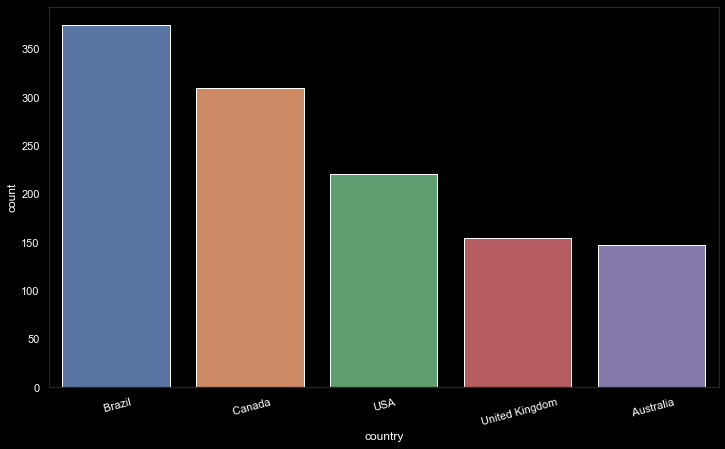

In [121]:
# grafica hombres por pais
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x="country", data=male, ax=ax, order=male.country.value_counts().iloc[1:6].index)
plt.xticks(rotation=15)
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
ax.set_facecolor('xkcd:black')
fig.patch.set_facecolor('black')
plt.savefig('paisMale.png');

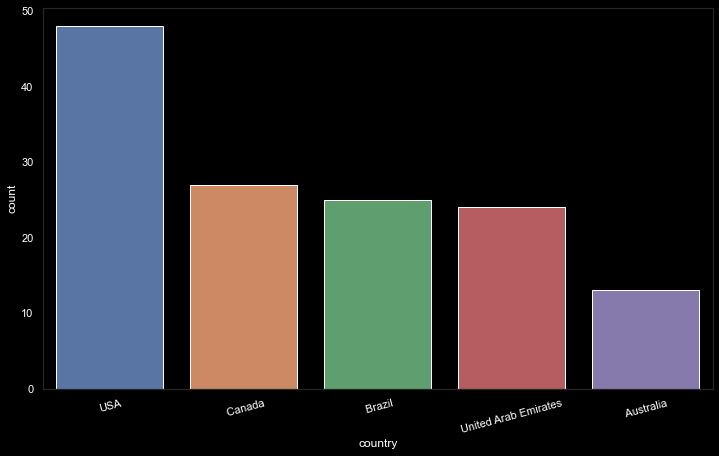

In [123]:
# grafica mujeres por pais (arabia saudita)
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x="country", data=female, ax=ax, order=female.country.value_counts().iloc[1:6].index)
plt.xticks(rotation=15)
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
ax.set_facecolor('xkcd:black')
fig.patch.set_facecolor('black')
plt.savefig('paisFEMALE.png');

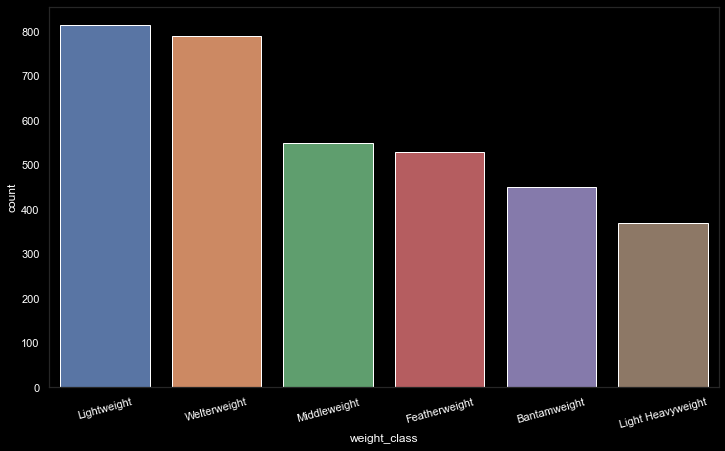

In [124]:
# grafica hombres por clase
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x="weight_class", data=maleclass, ax=ax, order=maleclass.weight_class.value_counts().iloc[:6].index)
plt.xticks(rotation=15)
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
ax.set_facecolor('xkcd:black')
fig.patch.set_facecolor('black')
plt.savefig('maleCLASS.png');

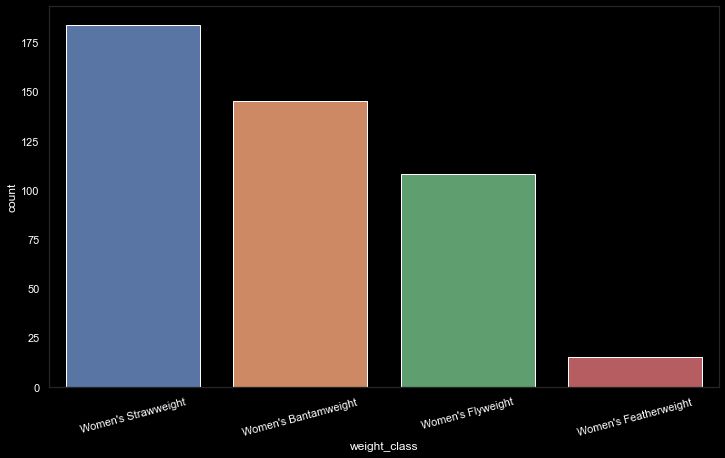

In [125]:
# grafica mujeres por clase
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x="weight_class", data=femaleclass, ax=ax, order=femaleclass.weight_class.value_counts().iloc[:5].index)
plt.xticks(rotation=15)
ax.set_facecolor('xkcd:black')
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
fig.patch.set_facecolor('black')
plt.savefig('classFEMALE.png');

In [4]:
# creacion de variables numericas por conteo de valores unicos
a = alcance.pivot_table(index=['mejor_alcance'], aggfunc="size")
b = tamaño.pivot_table(index=['ganador_height'], aggfunc='size')

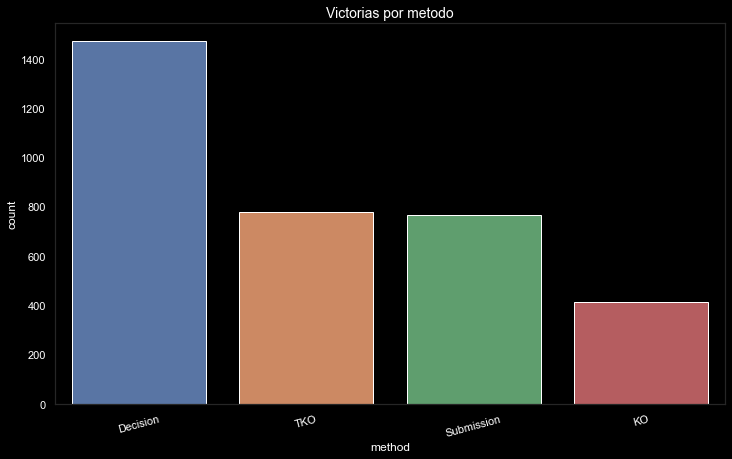

In [126]:
# victorias por metodo
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.countplot(x="method", data=metodo, ax=ax, order=metodo.method.value_counts().iloc[:4].index)
plt.title("Victorias por metodo", fontsize=14)
plt.xticks(rotation=15)
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
ax.set_facecolor('xkcd:black')
fig.patch.set_facecolor('black')
plt.savefig('metodo.png');

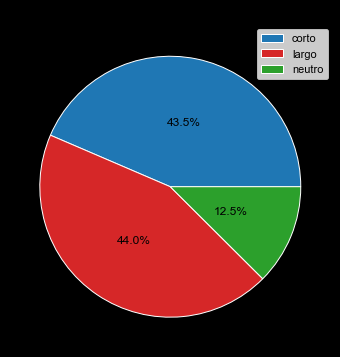

In [132]:
# victorias por alcance
pie, ax = plt.subplots(figsize=[10,6], facecolor="black")
plt.pie(x=a , autopct="%.1f%%", pctdistance=0.5,colors=["tab:blue","tab:red","tab:green"])
plt.title("Por alcance", fontsize=14)
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.legend(["corto","largo","neutro"])
plt.savefig('alcance.png');

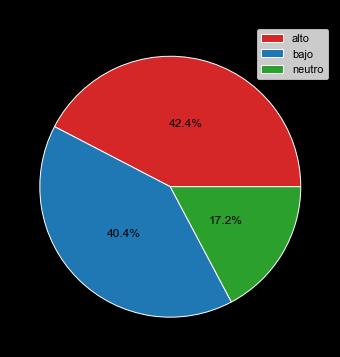

In [133]:
# victorias por tamaño
pie, ax = plt.subplots(figsize=[10,6], facecolor="black")
plt.pie(x=b , autopct="%.1f%%", pctdistance=0.5,colors=["tab:red","tab:blue","tab:green"])
plt.title("Por tamaño", fontsize=14)
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.legend(["alto","bajo","neutro"])
plt.savefig('tamaño.png');